## BREAKING TEXT CAPTCHA (BASIC NEURAL NETWORK) MODEL WITH MNIST DATASET

In [11]:
### Import various libraries ###
import tensorflow as tf 
import numpy as np
import graphviz
from tensorflow.keras.datasets import mnist
from keras.callbacks import ModelCheckpoint
import pydot
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
### Import MNIST Data ###
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [7]:
### Number of Unique Train Labels ###
unique, counts = np.unique(Y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

### Number of Unique Test Labels ###
unique, counts = np.unique(Y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


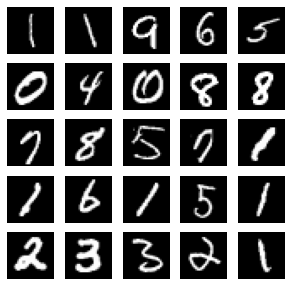

In [8]:
### Print 25 Mnist Digits from Train Dataset ###
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = Y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [13]:
### Compute Number of Labels ###
num_labels = len(np.unique(Y_train))

### Convert Y_train and Y_test to a Single One-Hot Vector ##
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [14]:
### Preprocess Data ###
image_size = X_train.shape[1]
input_size = image_size * image_size
input_size

### Resize and Normalize ###
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255

In [15]:
### Define Network Parameters ###
batch_size = 128
hidden_units = 256
dropout = 0.45

### Build the network ###
network = Sequential()
network.add(Dense(hidden_units, input_dim=input_size))
network.add(Activation('relu'))
network.add(Dropout(dropout))
network.add(Dense(hidden_units))
network.add(Activation('relu'))
network.add(Dropout(dropout))
network.add(Dense(num_labels))
network.add(Activation('softmax'))

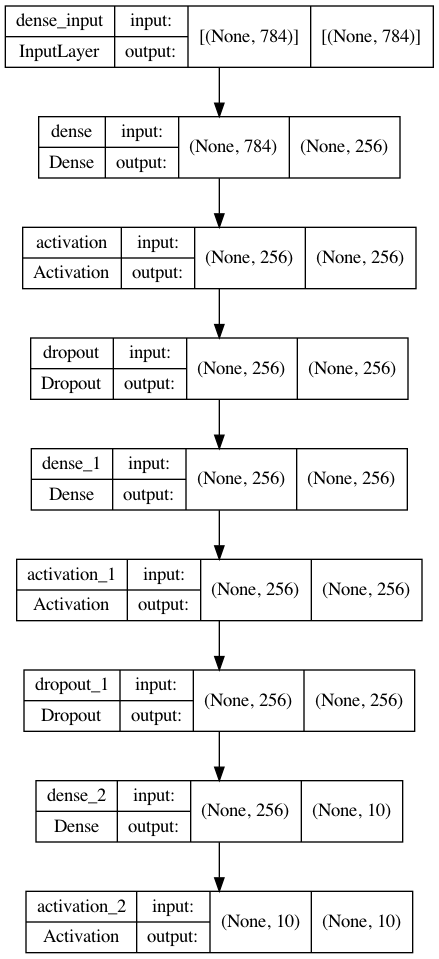

In [17]:
### Plot the Network for viewing ###
plot_model(network, to_file='network_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
### Summary of the Network ###
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [19]:
### Compile the Network ###
network.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
### Train the model ###
network.fit(X_train, Y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4268 - accuracy: 0.8681
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1941 - accuracy: 0.9415
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1522 - accuracy: 0.9541
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1303 - accuracy: 0.9610
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1139 - accuracy: 0.9648
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1017 - accuracy: 0.9687
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0.9703
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9732
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0837 - accuracy: 0.9739
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9764

In [22]:
### Model Evaluation ###
loss, acc = network.evaluate(X_test, Y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 1ms/step - loss: 0.0612 - accuracy: 0.9836

Test accuracy: 98.4%
